In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

### Problem 1 (a)

In [2]:
def mykde(x,h):
    data=np.linspace(np.min(x),np.max(x),len(x)).reshape(len(x),1)

    guassian_kernel=np.zeros(x.size*x.size).reshape(x.size,x.size)
    
    for i in range(len(x)):
        for j in range(len(x)):
            guassian_kernel[j][i]=((np.sqrt(2*np.pi*h**2))**-1)*(np.exp(-(((x[j]-data[i])**2)/(2*h**2))))
 
   
    guassian_kernel_sum=np.sum(guassian_kernel,axis=0)
    
    return guassian_kernel_sum/len(x)

In [3]:
N=1000
u1=np.array([5])
sigma1=[[1]]
np.random.seed(4)
x=np.random.multivariate_normal(u1,sigma1,N)

In [4]:
p_1=mykde(x,0.1)
p_2=mykde(x,1)
p_3=mykde(x,5)
p_4=mykde(x,10)
data=np.linspace(np.min(x),np.max(x),len(x)).reshape(len(x),1)

Text(4.9, 0.05, 'h=10')

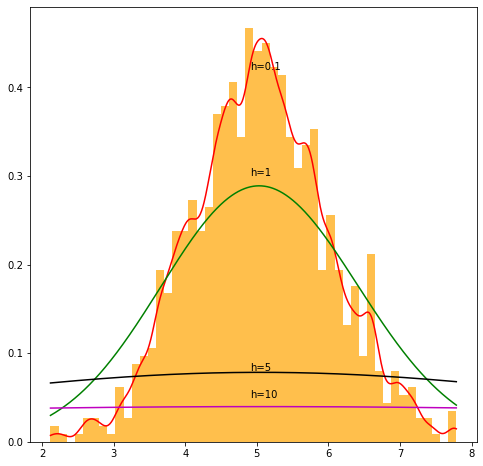

In [5]:
plt.figure(figsize=(8,8))
plt.hist(x, bins=50,density=True,color='orange',alpha=0.7)
plt.plot(data[:],p_1,color='r')
plt.text(4.9,0.42,'h=0.1')
plt.plot(data[:],p_2,color='g')
plt.text(4.9,0.3,'h=1')
plt.plot(data[:],p_3,color='k')
plt.text(4.9,0.08,'h=5')
plt.plot(data[:],p_4,color='m')
plt.text(4.9,0.05,'h=10')

### Problem 1 (b)

In [6]:
N=1000
u2=np.array([0])
sigma2=[[0.2]]
np.random.seed(4)
X_2=np.random.multivariate_normal(u2,sigma2,N)
p_1=mykde(X_2,0.1)
p_2=mykde(X_2,1)
p_3=mykde(X_2,5)
p_4=mykde(X_2,10)

Text(-0.08, 0.048, 'h=10')

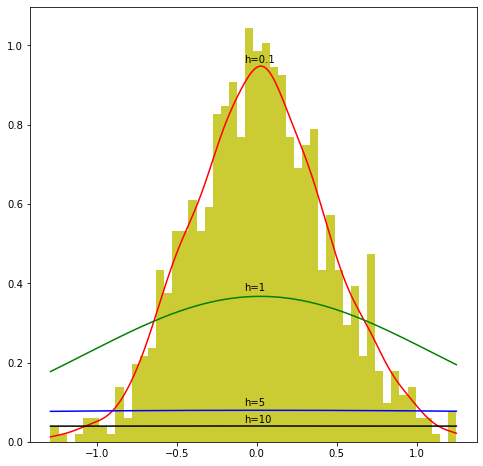

In [7]:
data=np.linspace(np.min(X_2),np.max(X_2),len(X_2)).reshape(len(X_2),1)
plt.figure(figsize=(8,8))
plt.hist(X_2, bins=50,density=True,alpha=0.8,color='y')
plt.plot(data[:],p_1,color='r')
plt.text(-0.08,0.957,'h=0.1')
plt.plot(data[:],p_2,color='g')
plt.text(-0.08,0.38,'h=1')
plt.plot(data[:],p_3,color='b')
plt.text(-0.08,0.09,'h=5')
plt.plot(data[:],p_4,color='k')
plt.text(-0.08,0.048,'h=10')

### Problem 1 (2)

In [8]:
N=500
u1=[1,0]
u2=[0,2.5]
sigma1=[[0.9,0.4],[0.4,0.9]]
sigma2=[[0.9,0.4],[0.4,0.9]]
x_1=np.random.multivariate_normal(u1,sigma1,N)
x_2=np.random.multivariate_normal(u2,sigma2,N)
x_=np.concatenate((x_1,x_2),axis=0)
x_.shape

(1000, 2)

In [9]:
def mykde1(x,h):
    #data=np.linspace(np.min(x),np.max(x),len(x)).reshape(len(x),1)
    mins = np.array(np.min(x,axis = 0))
    maxs = np.array(np.max(x,axis = 0))
    data = np.linspace(mins[0],maxs[0], len(x))
    data = np.append(data,np.linspace(mins[1],maxs[1], len(x)))
    data = data.reshape(len(x),2)
    d=((x[:,0]**2+x[:,1]**2)).reshape(1000,1)
    p=np.linspace(np.min(d),np.max(d),len(d)).reshape(1000,1)
    guassian_kernel=np.zeros(x.size*x.size).reshape(x.size,x.size)
    for i in range(len(x)):
        for j in range(len(x)):
            guassian_kernel[j][i]=((2*np.pi*h**2)**-1)*(np.exp(-(((d[j]-p[i])**2)/(2*h**2))))
    #print('Shape:',guassian_kernel.shape)
   
    guassian_kernel_sum=np.sum(guassian_kernel,axis=0)
    kde=(guassian_kernel_sum/len(x))
    kde=kde.reshape(1000,2)
    return kde

In [18]:
mins = np.array(np.min(x_,axis = 0))
maxs = np.array(np.max(x_,axis = 0))
data = np.linspace(mins[0],maxs[0], len(x))
data = np.append(data,np.linspace(mins[1],maxs[1], len(x)))
data=data.reshape(1000,2)

### h=0.1

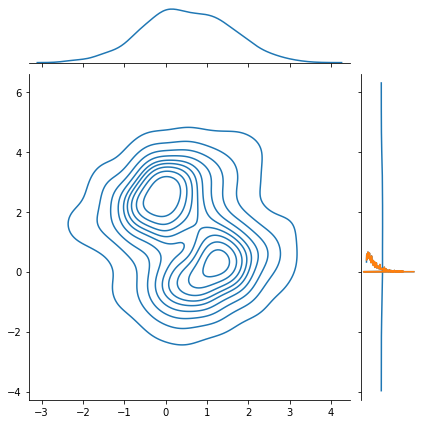

In [21]:
kde=mykde1(x_,0.1)
plot_ = sns.jointplot(x = x_[:,0], y = x_[:,1],kind = "kde")
plt.plot(data[:,0],kde[:,0])
plt.plot(data[:,1],kde[:,1])        
plt.show()

### h=1

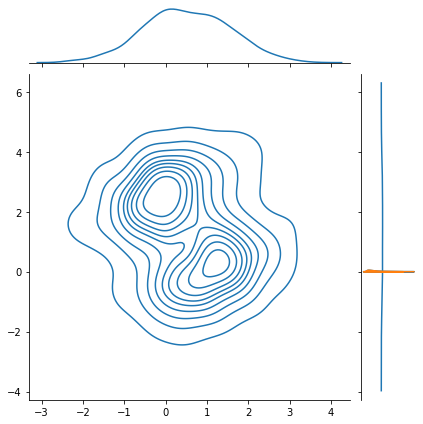

In [22]:
kde=mykde1(x_,1)
plot_ = sns.jointplot(x = x_[:,0], y = x_[:,1],kind = "kde")
plt.plot(data[:,0],kde[:,0])
plt.plot(data[:,1],kde[:,1])        
plt.show()

### h=5

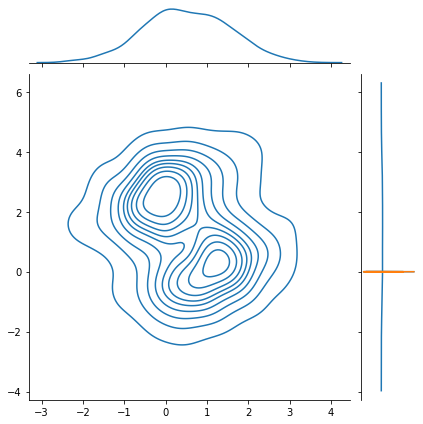

In [23]:
kde=mykde1(x_,5)
plot_ = sns.jointplot(x = x_[:,0], y = x_[:,1],kind = "kde")
plt.plot(data[:,0],kde[:,0])
plt.plot(data[:,1],kde[:,1])        
plt.show()

### h=10

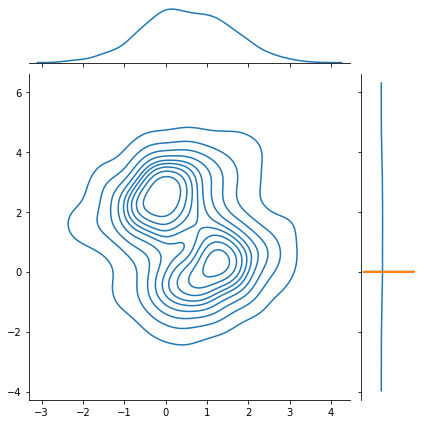

In [24]:
kde=mykde1(x_,10)
plot_ = sns.jointplot(x = x_[:,0], y = x_[:,1],kind = "kde")
plt.plot(data[:,0],kde[:,0])
plt.plot(data[:,1],kde[:,1])        
plt.show()

# Problem 2 

In [473]:
def mypca(x,k):
    
    x_mean=np.mean(x,axis=0)
    
    x_normalised=x-x_mean
    
    l=np.dot(x_normalised.T,x_normalised)
    
    values,vectors=np.linalg.eigh(l)
    
    sort_values=(np.argsort(values)[::-1])[:k]
    
    vectors=vectors[:,sort_values]
    
    cov_matrix=np.dot(x_normalised,vectors)
    
    reconstructed_data=np.dot(cov_matrix,vectors.T) 
    reconstruction=[]
    for i in range(len(x_mean)):
        recontruction_data=reconstructed_data[:,i]+x_mean[i]
        reconstruction.append(recontruction_data)
    pca_reconstruction=np.array(reconstruction).T
    
    return cov_matrix,pca_reconstruction

### Problem 2 (1)

#### Reduction of 222D to 20D

In [808]:
df=pd.read_csv('Downloads/Data Stock/2014_Financial_Data.csv')
df=df.replace(np.nan,0)
x=df.drop(['Class','Sector','Unnamed: 0'],axis=1)
y=df[['Class']]

In [812]:
%time pca,_=mypca(x,20)
print('Original Dataset with 222-D: ',x.shape)
print('Reduced Dataset to 20-D: ',pca.shape)

CPU times: user 65.2 ms, sys: 7.15 ms, total: 72.4 ms
Wall time: 43.5 ms
Original Dataset with 222-D:  (3808, 222)
Reduced Dataset to 20-D:  (3808, 20)


## Problem 2 (2)

In [588]:
df=pd.read_csv('Downloads/mnist_train.csv')
df=df.dropna()
y=df[['label']]
df=df.drop('label',axis=1)

In [589]:
%time pca,reconstructed_data=mypca(df,20)

CPU times: user 3.82 s, sys: 902 ms, total: 4.72 s
Wall time: 2.94 s


# Problem 2 (3)

In [590]:
reduced_data,reconstructed_data=mypca(df,2)
data=np.concatenate((reduced_data,np.array(y)),axis=1)
data=pd.DataFrame(data,columns=['Feature_1','Feature_2','Label'])

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

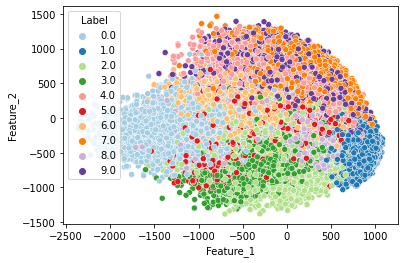

In [591]:
sns.scatterplot(x=data.Feature_1,y=data.Feature_2,hue=data.Label,palette='Paired')

## Problem 2 (4)

In [592]:
reduced_data,reconstructed_data=mypca(df,10)

### Original Image

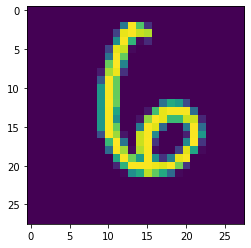

In [601]:
import matplotlib.image as mpimg
i=np.array(df.iloc[11128:11129,0:784]).reshape(28,28)
imgplot = plt.imshow(i)

### Reconstructed Image

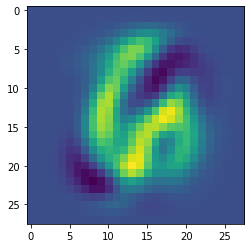

In [602]:
img=(reconstructed_data[11128:11129,:784]).reshape(28,28)
imgplot = plt.imshow(img)

# Problem 2 (5)

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [90]:
pca,_=mypca(df,30)

In [186]:
x_train_df,x_test_df,y_train_df,y_test_df=train_test_split(df,y,test_size=0.2,random_state=12)
x_train_pca,x_test_pca,y_train_pca,y_test_pca=train_test_split(pca,y,test_size=0.2,random_state=12)

In [209]:
l_data=LogisticRegression(max_iter=10)
l_pca=LogisticRegression(max_iter=10)

In [210]:
import warnings
warnings.filterwarnings("ignore")
import time

#Unreduced Data
start=time.time()
l_data.fit(x_train_df,y_train_df)
stop=time.time()
print('Training Time: ',stop-start,'s')
y_hat_df=l_data.predict(x_test_df)

#PCA
start=time.time()
l_pca.fit(x_train_pca,y_train_pca)
stop=time.time()
print('Training Time: ',stop-start,'s')
y_hat_pca=l_pca.predict(x_test_pca)

Training Time:  2.953159809112549 s
Training Time:  0.4307129383087158 s


In [211]:
print('Accuracy of Data: ',accuracy_score(y_test_df,y_hat_df))
print('Accuracy of PCA: ',accuracy_score(y_test_pca,y_hat_pca))

Accuracy of Data:  0.8826666666666667
Accuracy of PCA:  0.8805


In [212]:
df.shape

(60000, 784)

In [213]:
x_train.shape

(48000, 30)

### Problem 2 (6)

In [224]:
images=l_data.coef_
images.shape

(10, 784)

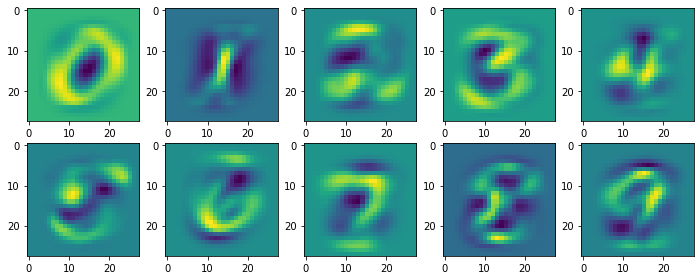

In [806]:
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(images[i].reshape(28,28))